# Librería Networkx


<img src="https://networkx.org/_static/networkx_logo.svg" width="400px"/>

*NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.*

https://networkx.org/

Las relaciones entre elementos se pueden guardar con un grafo.

In [3]:
import networkx as nx

import matplotlib.pyplot as plt

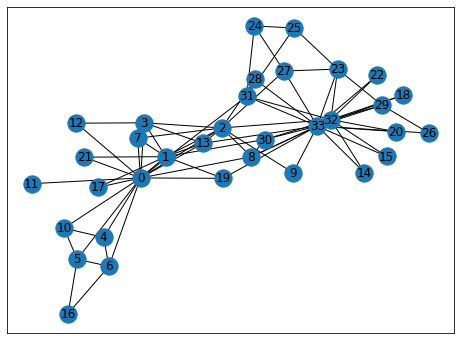

In [4]:
g = nx.karate_club_graph() # Generador de grafo 
fig, ax = plt.subplots(figsize=(8, 6)) # es opcional.
nx.draw_networkx(g, ax=ax)

# Graph generators
Tipos: https://networkx.org/documentation/stable/reference/classes/index.html

### Generación manual

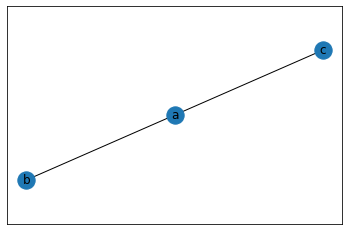

In [14]:
## Generamos un grafo a partir de las aristas
e = [("a","b"),("a","c")]

G = nx.Graph()
G.add_edges_from(e)
nx.draw_networkx(G)

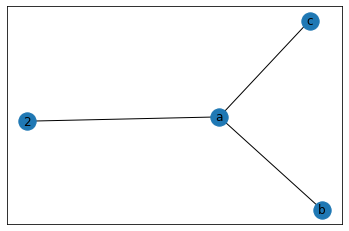

In [15]:
G.add_edge("a", 2)
nx.draw_networkx(G)

In [16]:
G.edges() # A graph has edges

EdgeView([('a', 'b'), ('a', 'c'), ('a', 2)])

In [19]:
print(G.nodes()) # A graph has nodes
for n in G.nodes():
    print("Node:",n)

['a', 'b', 'c', 2]
Node: a
Node: b
Node: c
Node: 2


In [20]:
print(len(G.nodes))

4


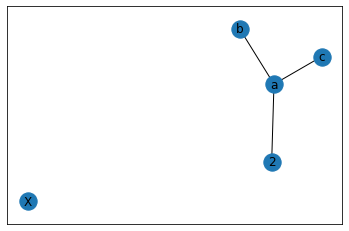

In [22]:
# También podemos añadir nodos
G.add_node("X")
nx.draw_networkx(G)

#### Podemos modelizar relaciones y, también construirlos mediante diccionarios

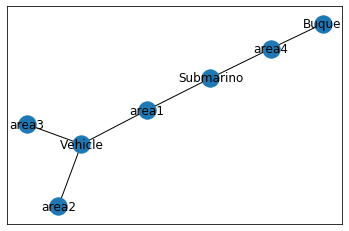

In [27]:
data = {"Vehicle":["area1","area2","area3"],
        "Submarino": ["area1","area4"],
        "Buque":["area4"]}
g = nx.Graph(data)
nx.draw_networkx(g)

In [28]:
print(g.edges("Submarino"))

[('Submarino', 'area1'), ('Submarino', 'area4')]


In [32]:
list(g.neighbors("area4"))

['Submarino', 'Buque']

#### Nodes and edges can have attributes

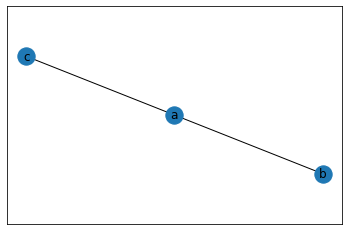

In [72]:
e = [("a","b"),("a","c")]
g = nx.Graph()
g.add_edges_from(e)
nx.draw_networkx(g)

In [55]:
print(g.nodes())
print(g.edges())

['a', 'b', 'c']
[('a', 'b'), ('a', 'c')]


In [56]:
g.nodes["a"]["Temperature"] = 9.0
g.nodes["a"]["SensorStatus"] = True
g.edges[('a', 'b')]["weight"] = 5

In [57]:
g.nodes["a"]    # como un diccionario

{'Temperature': 9.0, 'SensorStatus': True}

In [58]:
g.edges.data() # como un listado de información

EdgeDataView([('a', 'b', {'weight': 5}), ('a', 'c', {})])

In [68]:
# o podemos extraer todos los atributos
temp = nx.get_node_attributes(g,"Temperature")
print(temp)

{'a': 9.0}


In [67]:
### Tambien podemos asignar un atributo
### a todos los nodos o edges mediante la creación de un diccionario
import random
values = {node:random.randint(-10,50) for node in g.nodes()}
print(values)
nx.set_node_attributes(g,values,"temperature")
print(g.nodes["b"])

{'a': 20, 'b': 16, 'c': -1}
{'temperature': 16}


## Carga y exportación de grafos
https://networkx.org/documentation/stable/reference/readwrite/index.html

In [83]:
nx.write_gexf(g,"example_graph.gexf")

In [97]:
#Matrices de adyacencia
matrix = nx.to_numpy_matrix(g)
print(matrix)

[[0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0.

In [99]:
#https://networkx.org/documentation/stable/reference/convert.html#pandas
df = nx.to_pandas_adjacency(g)
print(df.head())

    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
3  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0   
4  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0   

    15   16   17   18   19  
0  1.0  0.0  0.0  0.0  1.0  
1  0.0  1.0  1.0  0.0  1.0  
2  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  1.0  0.0  
4  1.0  0.0  0.0  0.0  0.0  


### Tools for visualization
- Gephi https://gephi.org/
- Pajek http://vlado.fmf.uni-lj.si/pub/networks/pajek/
- Cytoscape

## Generadores
https://networkx.org/documentation/stable/reference/generators.html

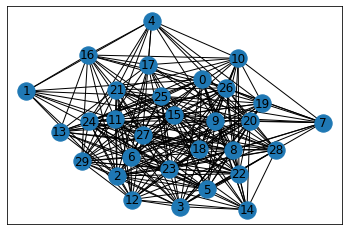

In [75]:
# https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph
g = nx.erdos_renyi_graph(30,0.6)
nx.draw_networkx(g)

DegreeView({0: 13, 1: 4, 2: 8, 3: 1, 4: 12, 5: 12, 6: 6, 7: 7, 8: 17, 9: 6, 10: 24, 11: 27, 12: 18, 13: 25, 14: 22, 15: 16, 16: 13, 17: 19, 18: 17, 19: 15, 20: 15, 21: 12, 22: 11, 23: 13, 24: 14, 25: 13, 26: 10, 27: 10, 28: 10, 29: 10})

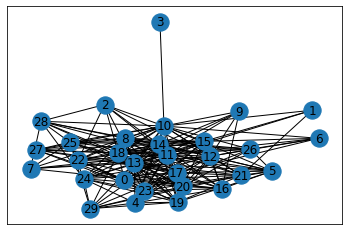

In [80]:
g = nx.barabasi_albert_graph(30,10,seed=10)
nx.draw_networkx(g)

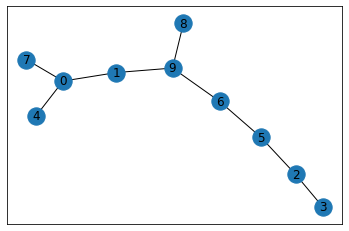

In [77]:
g = nx.random_tree(10,seed=0)
nx.draw_networkx(g)

In [ ]:
# un largo etcetera....

## Algoritmos

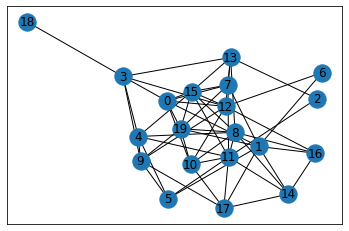

In [88]:
g = nx.fast_gnp_random_graph(20,p=.3)
nx.draw_networkx(g)
#Grado de cada nodo / Número de aristas

In [89]:
nx.degree(g) # Grado

DegreeView({0: 7, 1: 8, 2: 2, 3: 6, 4: 6, 5: 4, 6: 2, 7: 6, 8: 8, 9: 6, 10: 6, 11: 9, 12: 8, 13: 6, 14: 5, 15: 8, 16: 4, 17: 5, 18: 1, 19: 7})

### <span style="color:blue">ACTIVIDAD - Break</span>
El objetivo es realizar un histograma con el degree de los nodos.
Guarda este valor como un atributo.
Exporta el grafo y visualizalo (con Gephi) escalandolo el tamaño del nodo por el valor del degree


In [154]:
## DO IT

In [90]:
## Más algoritmos
nx.degree_centrality(g) # Grado de centralidad de los notods

{0: 0.3684210526315789,
 1: 0.42105263157894735,
 2: 0.10526315789473684,
 3: 0.3157894736842105,
 4: 0.3157894736842105,
 5: 0.21052631578947367,
 6: 0.10526315789473684,
 7: 0.3157894736842105,
 8: 0.42105263157894735,
 9: 0.3157894736842105,
 10: 0.3157894736842105,
 11: 0.47368421052631576,
 12: 0.42105263157894735,
 13: 0.3157894736842105,
 14: 0.2631578947368421,
 15: 0.42105263157894735,
 16: 0.21052631578947367,
 17: 0.2631578947368421,
 18: 0.05263157894736842,
 19: 0.3684210526315789}

In [91]:
nx.closeness_centrality(g) # Grado de cercania 

{0: 0.59375,
 1: 0.59375,
 2: 0.4418604651162791,
 3: 0.5757575757575758,
 4: 0.5757575757575758,
 5: 0.5277777777777778,
 6: 0.4634146341463415,
 7: 0.5757575757575758,
 8: 0.59375,
 9: 0.5757575757575758,
 10: 0.5757575757575758,
 11: 0.6129032258064516,
 12: 0.6333333333333333,
 13: 0.5588235294117647,
 14: 0.5277777777777778,
 15: 0.6129032258064516,
 16: 0.5277777777777778,
 17: 0.5428571428571428,
 18: 0.37254901960784315,
 19: 0.5757575757575758}

In [92]:
nx.closeness_vitality(g) # Grado de vitalidad

{0: 30.0,
 1: 23.0,
 2: 43.0,
 3: -inf,
 4: 31.0,
 5: 35.0,
 6: 41.0,
 7: 32.0,
 8: 30.0,
 9: 30.0,
 10: 33.0,
 11: 22.0,
 12: 20.0,
 13: 30.0,
 14: 36.0,
 15: 31.0,
 16: 35.0,
 17: 34.0,
 18: 51.0,
 19: 32.0}

In [94]:
list(nx.chain_decomposition(g))

[[(0, 3), (3, 4), (4, 5), (5, 1), (1, 0)],
 [(0, 12), (12, 9), (9, 3)],
 [(0, 10), (10, 12)],
 [(0, 7), (7, 13), (13, 2), (2, 11), (11, 8), (8, 10)],
 [(0, 15), (15, 7)],
 [(0, 19), (19, 15)],
 [(1, 6), (6, 12)],
 [(1, 7)],
 [(1, 19)],
 [(1, 14), (14, 11)],
 [(1, 16), (16, 14)],
 [(1, 17), (17, 14)],
 [(5, 9)],
 [(5, 11)],
 [(4, 9)],
 [(4, 8)],
 [(4, 15)],
 [(4, 11)],
 [(3, 12)],
 [(3, 13)],
 [(9, 19)],
 [(9, 17)],
 [(12, 15)],
 [(12, 13)],
 [(12, 16)],
 [(10, 19)],
 [(10, 11)],
 [(10, 17)],
 [(8, 15)],
 [(8, 19)],
 [(8, 13)],
 [(8, 14)],
 [(8, 16)],
 [(11, 7)],
 [(11, 15)],
 [(11, 17)],
 [(13, 15)],
 [(7, 19)]]

In [95]:
#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering
print(nx.clustering(g))

{0: 0.42857142857142855, 1: 0.17857142857142858, 2: 0, 3: 0.26666666666666666, 4: 0.4, 5: 0.3333333333333333, 6: 0, 7: 0.4666666666666667, 8: 0.32142857142857145, 9: 0.2, 10: 0.3333333333333333, 11: 0.25, 12: 0.21428571428571427, 13: 0.26666666666666666, 14: 0.5, 15: 0.42857142857142855, 16: 0.3333333333333333, 17: 0.3, 18: 0, 19: 0.38095238095238093}


In [153]:
## aún más largo etcétera

## Drawing
https://networkx.org/documentation/stable/reference/drawing.html

Layout: https://networkx.org/documentation/stable/reference/drawing.html#layout

{0: array([-0.19161867, -1.        ]), 1: array([ 0.33237393, -0.31016174]), 2: array([-0.62338605, -0.36800546]), 3: array([0.20949303, 0.23513431]), 4: array([-0.09779556, -0.05839442]), 5: array([0.34315469, 0.5048689 ]), 6: array([ 0.07062716, -0.2550151 ]), 7: array([0.12336804, 0.57250321]), 8: array([-0.18543539,  0.7776581 ]), 9: array([ 0.65390855, -0.57718947]), 10: array([-0.50555919,  0.5243658 ]), 11: array([ 0.05514182, -0.58760872]), 12: array([-0.20700606,  0.09786442]), 13: array([-0.91275695,  0.03788188]), 14: array([-0.49072358,  0.13785162]), 15: array([0.89236645, 0.43335236]), 16: array([-0.21224873,  0.36581153]), 17: array([-0.47672167, -0.52902247]), 18: array([ 0.70524136, -0.15213597]), 19: array([0.51757682, 0.15024123])}


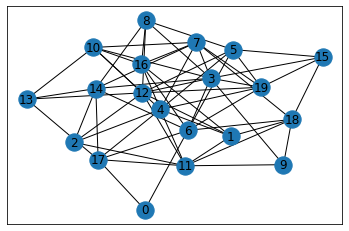

In [83]:
g = nx.fast_gnp_random_graph(20,p=.3)
pos = nx.kamada_kawai_layout(g)
print(pos)
nx.draw_networkx(g,pos=pos)

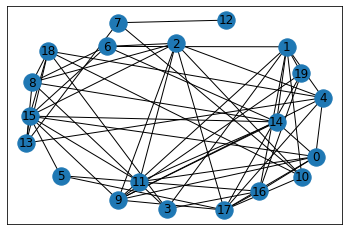

In [102]:
pos = nx.spring_layout(g,k=3.)
nx.draw_networkx(g,pos=pos)

In [15]:
g = nx.fast_gnp_random_graph(20,p=.3)
pos = nx.spring_layout(g,k=3.)
deg = nx.degree(g)
size = [x*100 for _,x in deg]

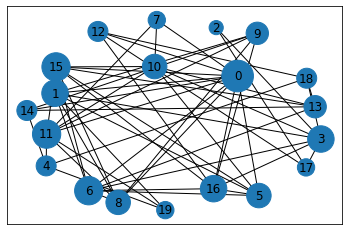

In [16]:
nx.draw_networkx(g,pos=pos,node_size=size)

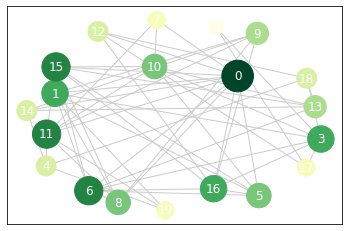

In [31]:
#https://matplotlib.org/stable/tutorials/colors/colormaps.html
norm = plt.Normalize()
colors = plt.cm.YlGn(norm(size)) 

nx.draw_networkx(g,pos=pos,node_size=size,node_color=colors,
                 edge_color="#CCCCCC",
                 font_color="white")

### <span style="color:blue">ACTIVIDAD - Final</span>
Generar un grafo con aquellos aeropuertos de un determinado tipo
y situar los nodos según ubicación geográfica (lat,long)

Usaremos estos datos:
https://datahub.io/core/airport-codes#curl

- Descargamos los datos
- Los cargamos en DF
- Filtramos aquellos que sean "large-airport"
- Generamos una nueva columna con la "pos" correcta
- Podemos limpiar columnas innecesarias
- Generamos el grafo, sólo con los nodos
- Visualizamos

*Nos faltaría añadir unas cuantas aristas (random?, otro dataset?)*

In [35]:
%%bash
curl -L https://datahub.io/core/airport-codes/r/0.csv >> data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   146  100   146    0     0    111      0  0:00:01  0:00:01 --:--:--   111
100 6086k  100 6086k    0     0  2531k      0  0:00:02  0:00:02 --:--:-- 7548k


In [142]:
import pandas as pd
df = pd.read_csv("data.csv",usecols=[0,1,5,11])
df.head()

,ident,type,iso_country,coordinates
0,00A,heliport,US,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,US,"-101.473911, 38.704022"
2,00AK,small_airport,US,"-151.695999146, 59.94919968"
3,00AL,small_airport,US,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,US,"-91.254898, 35.6087"


In [155]:
# TODO